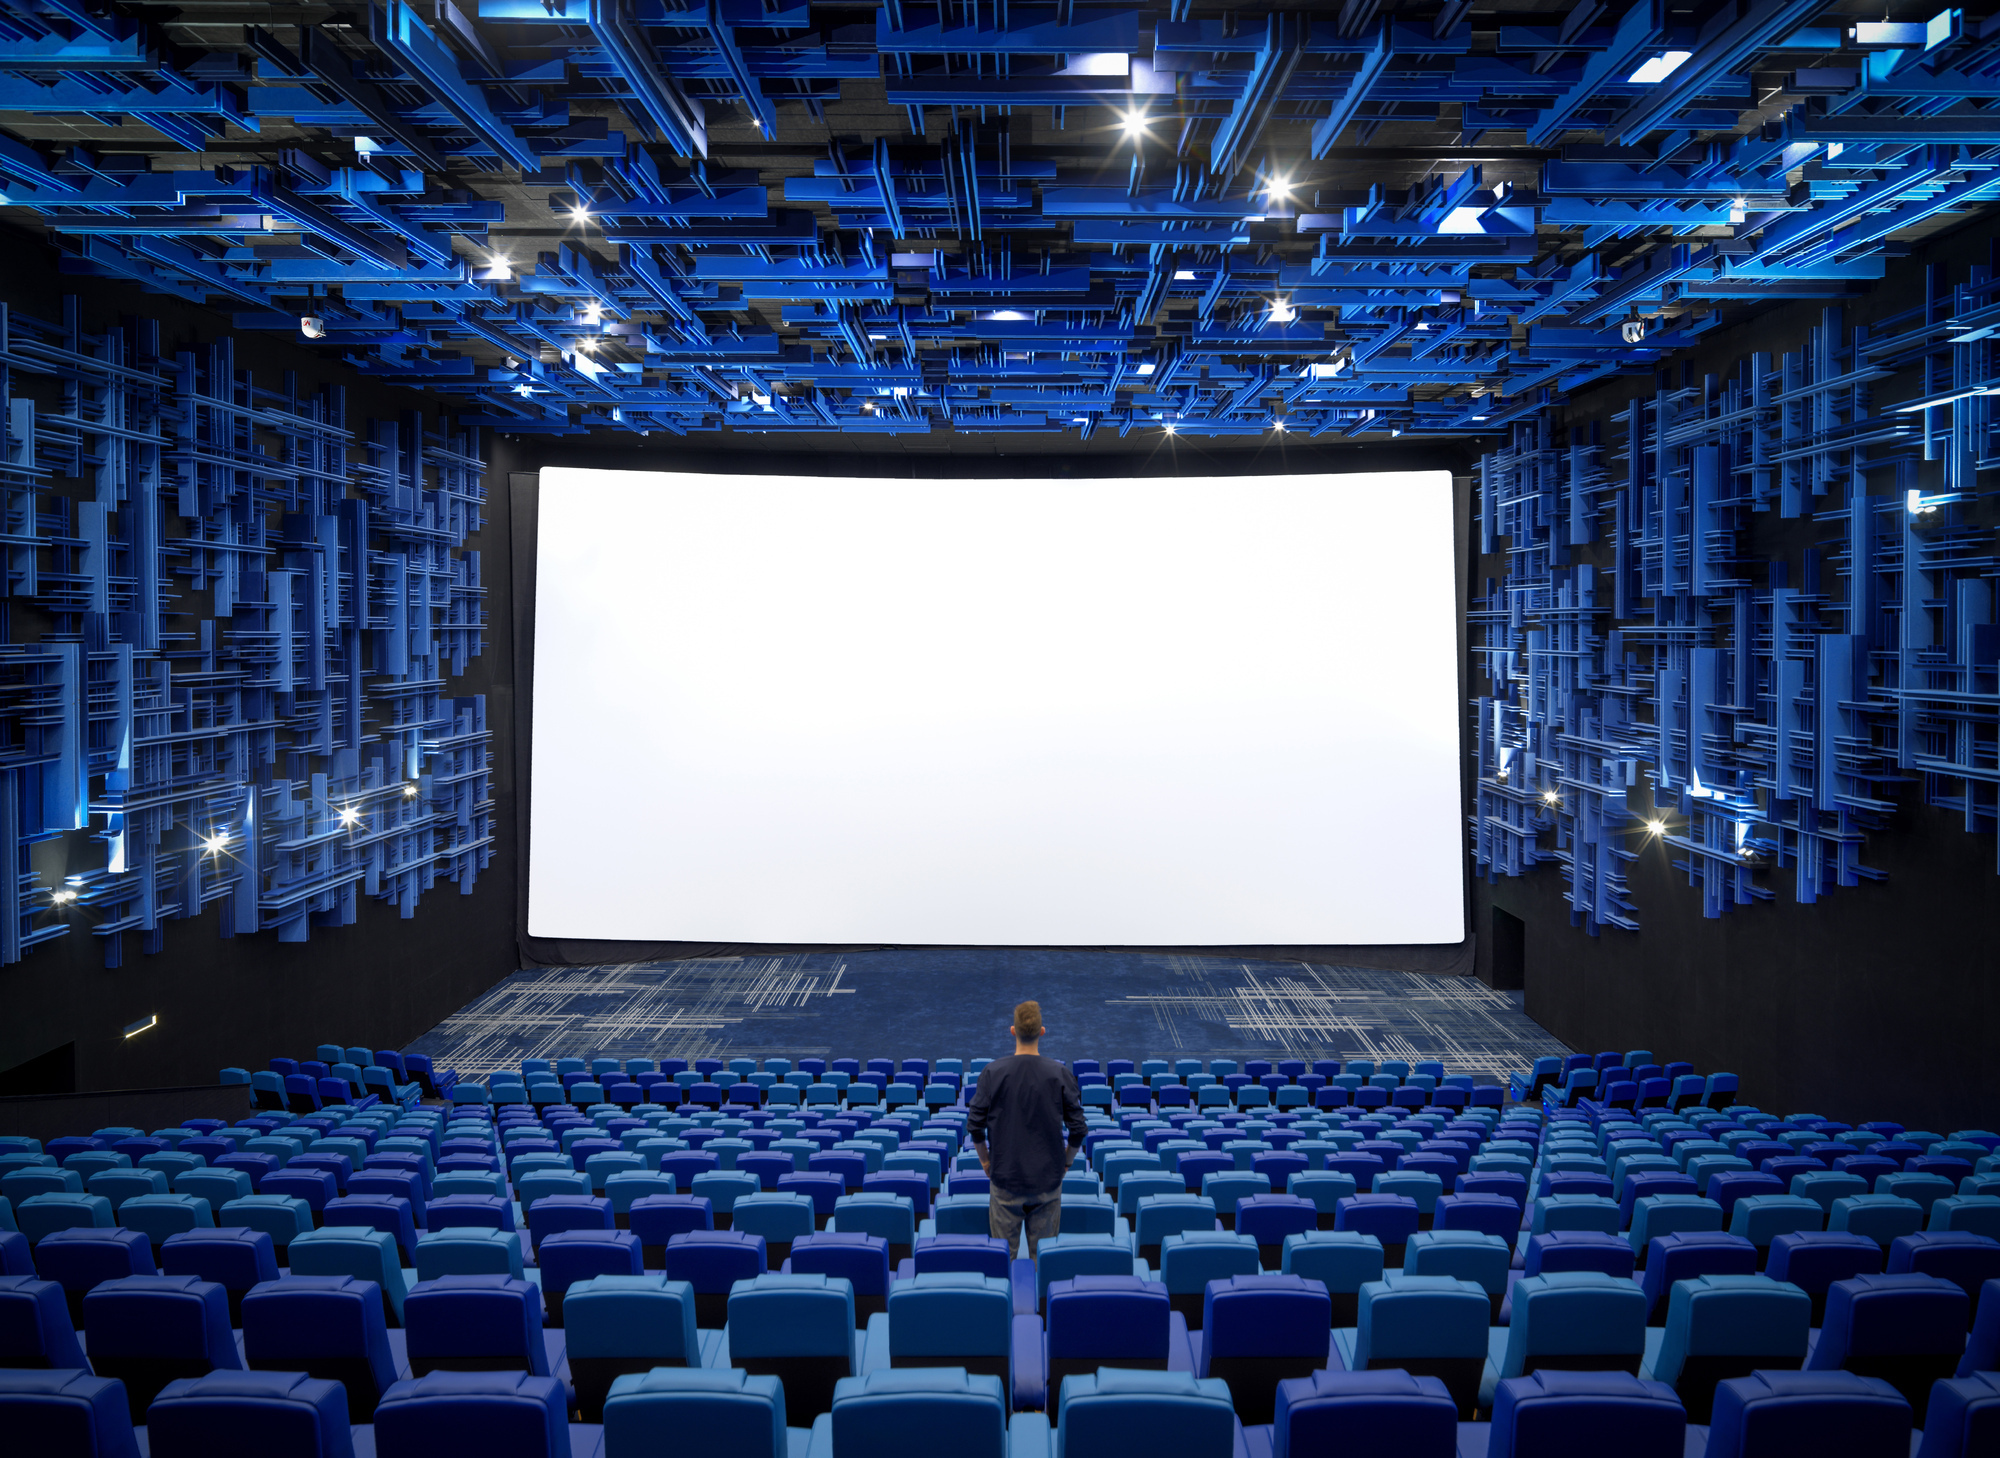

Photo by <a href= https://images.adsttc.com/media/images/5f7d/fef2/63c0/170a/9100/0273/large_jpg/Jiangnan_Photography.jpg?1602092773>Jiangnan_Photography</a> 

## Project Overview
This project analyzes datasets containing data on movies and helps identify the key things needed when starting a movie studio.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. To create a new movie studio, they'll have to know the type of movies being currently watched and how they perform financialy. Doing this will help them get an edge on the competition. 

## Data
Tmdb and im.db databases have a long listing of relevant data needed. Each having data on the genre, title and ratings of various movies produced over the years. The datasets also provided other data such as the writers and directors.

## Data Understanding
From leading review and rating databases and sites, relevant data is obtained and compiled.


In [1]:
# importing the most used libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# IMDB data

In [2]:
# To import relevant library for sql
import sqlite3
conn = sqlite3.connect('Data/im.db')   

OperationalError: unable to open database file

In [ ]:
# To know the tables in the database
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""
pd.read_sql(table_name_query,conn)

Table Names
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers

To know what movie_ratings table contains we query through the table as shown below.

In [ ]:
first_query = """
SELECT *
  FROM movie_ratings;
"""
pd.read_sql(first_query,conn)

movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]

To know what movie_basics table contains we query through the table as shown below.

In [ ]:
second_query = """
SELECT *
  FROM movie_basics;
"""
pd.read_sql(second_query,conn)

movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2                        The Other Side of the Wind        2018   
3                                   Sabse Bada Sukh        2018   
4                             La Telenovela Errante        2017   
...                                             ...         ...   
146139                          Kuambil Lagi Hatiku        2019   
146140  Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
146141                              Dankyavar Danka        2013   
146142                                       6 Gunn        2017   
146143               Chico Albuquerque - Revelações        2013   

        runtime_minutes                genres  
0                 175.0    Action,Crime,Drama  
1                 114.0       Biography,Drama  
2                 122.0                 Drama  
3                   NaN          Comedy,Drama  
4                  80.0  Comedy,Drama,Fantasy  
...                 ...                   ...  
146139            123.0                 Drama  
146140              NaN           Documentary  
146141              NaN                Comedy  
146142            116.0                  None  
146143              NaN           Documentary  

[146144 rows x 6 columns]

In [ ]:
# To know the 20 most recent movies to be produced
third_query = """
SELECT primary_title, start_year, genres
  FROM movie_basics
ORDER BY start_year DESC
LIMIT 20;
       
"""
pd.read_sql(third_query,conn)


primary_title  start_year  \
0                                     100 Years        2115   
1                                      Avatar 5        2027   
2                       Untitled Star Wars Film        2026   
3                                      Avatar 4        2025   
4                       Untitled Star Wars Film        2024   
5     Fantastic Beasts and Where to Find Them 5        2024   
6                       Untitled Marvel Project        2023   
7           Untitled Disney Live-Action Project        2023   
8                                      Avatar 3        2023   
9            Wraith of the Umbra and Eidolon II        2023   
10  Untitled Illumination Entertainment Project        2023   
11                  Untitled Disney Marvel Film        2022   
12                  Untitled Disney Marvel Film        2022   
13              The Hunchback of the Lighthouse        2022   
14                        Corazones en Llamas 5        2022   
15                           The Weary Traveler        2022   
16             Untitled Pixar Animation Project        2022   
17            Untitled Disney Animation Project        2022   
18                      Untitled Star Wars Film        2022   
19                          Mi Asesino Favorito        2022   

                      genres  
0                      Drama  
1   Action,Adventure,Fantasy  
2                    Fantasy  
3   Action,Adventure,Fantasy  
4                       None  
5   Adventure,Family,Fantasy  
6                     Action  
7                       None  
8     Action,Adventure,Drama  
9    Adventure,Drama,Fantasy  
10                      None  
11                    Action  
12                    Action  
13                     Drama  
14                    Action  
15                    Horror  
16                      None  
17                      None  
18                      None  
19              Comedy,Crime

Now that we know what the movie_ratings and movie_basics tables contain it is easy to obtain the data we want. 

In [ ]:
# Code below joins the movie_ratings and movie_basics tables and filters data 
#based on number of votes a movie has and orders the data based on averagerating
fourth_query = """
SELECT *
  FROM movie_basics
       INNER JOIN movie_ratings
       ON movie_basics.'movie_id' = movie_ratings.'movie_id'
 WHERE numvotes > 100
 ORDER BY averagerating DESC
 LIMIT 40;
       
"""
pd.read_sql(fourth_query,conn)

movie_id                                      primary_title  \
0    tt9537008                                  Gini Helida Kathe   
1    tt7131622                  Once Upon a Time ... in Hollywood   
2    tt8718580                                          Eghantham   
3    tt9680166                          Yeh Suhaagraat Impossible   
4    tt9343826                                Ananthu V/S Nusrath   
5    tt6058226                                Ekvtime: Man of God   
6    tt4131686                                     I Want to Live   
7    tt9760512                                    D/O Parvathamma   
8    tt9417594                   Kosovo: A Moment In Civilization   
9    tt5963218                                      Aloko Udapadi   
10   tt6842524  Hare Krishna! The Mantra, the Movement and the...   
11   tt8866064                         10 Days Before the Wedding   
12   tt8354112                                              Mosul   
13   tt8063272                          Uninvited: Marcelo Burlon   
14   tt7738784                                            Peranbu   
15   tt8203706                                American Deep State   
16   tt9390200                                       Dokyala Shot   
17   tt2264978                         Harvesting the High Plains   
18   tt5858514                            The Children of Genghis   
19   tt3746274                             Mama's Heart. Gongadze   
20   tt6693242                                         3 Wheeling   
21  tt10084190                     Chandigarh amritsar chandigarh   
22   tt2185170                                       Jurisdiction   
23   tt5624252                                 That Vitamin Movie   
24   tt7562038                                     Butcher Angels   
25   tt6859280     The Nagano Tapes: Rewound, Replayed & Reviewed   
26   tt5813916                                    The Mountain II   
27   tt5354160                                           Aynabaji   
28  tt10380266                                     Adutha Chodyam   
29   tt2357748  Rock and Roll's Greatest Failure: Otway the Movie   
30   tt8176142                               Oru Kadhai Sollatuma   
31   tt4450674                                          Druglawed   
32   tt2170667                                             Wheels   
33   tt5759506                                       Avec l'amour   
34   tt4126322                                        The Ataxian   
35   tt5375100                                       Paint Drying   
36   tt5593384                                  Truth and Justice   
37   tt7214598                             Land of Hope and Glory   
38   tt6487784                                 Generation Freedom   
39   tt5773402                                           Dominion   

                                       original_title  start_year  \
0                                   Gini Helida Kathe        2019   
1                   Once Upon a Time ... in Hollywood        2019   
2                                           Eghantham        2018   
3                           Yeh Suhaagraat Impossible        2019   
4                                 Ananthu V/S Nusrath        2018   
5                                 Ekvtime: Man of God        2018   
6                                      I Want to Live        2015   
7                                     D/O Parvathamma        2019   
8                    Kosovo: A Moment In Civilization        2017   
9                                       Aloko Udapadi        2017   
10  Hare Krishna! The Mantra, the Movement and the...        2017   
11                         10 Days Before the Wedding        2018   
12                                              Mosul        2019   
13                          Uninvited: Marcelo Burlon        2017   
14                                            Peranbu        2018   
15                                American Deep State        2019   
16 

In [ ]:
fifth_query = """
SELECT genres,COUNT(genres) AS main_genres, runtime_minutes, averagerating, numvotes
  FROM movie_basics
       JOIN movie_ratings
       ON movie_basics.'movie_id' = movie_ratings.'movie_id'
 WHERE numvotes > 100
 GROUP BY genres
 ORDER BY averagerating DESC 
 LIMIT 50
;
"""
im_df = pd.read_sql(fifth_query,conn)

In [ ]:
# Top 50 genres by averagerating 
im_df

genres  main_genres  runtime_minutes  \
0         Documentary,Music,Sport            3             96.0   
1           Documentary,Music,War            1             95.0   
2                     Documentary         1771             87.0   
3            Comedy,Music,Musical            4            110.0   
4             Adventure,Drama,War            1             90.0   
5            Drama,Family,Musical            4            120.0   
6     Adventure,Documentary,Sport            5             46.0   
7         Documentary,History,War           17             99.0   
8           Comedy,Crime,Thriller           28            135.0   
9   Adventure,Documentary,History            3            103.0   
10              Drama,Mystery,War            6            131.0   
11           Drama,Fantasy,Horror           69            104.0   
12      Crime,Documentary,Mystery            8            107.0   
13         Comedy,History,Musical            1            134.0   
14              Animation,History            1            135.0   
15           Romance,Thriller,War            1            125.0   
16   Documentary,History,Thriller            5             77.0   
17       Documentary,History,News           33            125.0   
18     Documentary,Fantasy,Horror            1             60.0   
19     Documentary,Family,History            7             80.0   
20         Comedy,Musical,Western            1            120.0   
21  Animation,Documentary,Mystery            1             93.0   
22        Animation,Crime,Mystery            1            116.0   
23      Documentary,History,Music           17             85.0   
24         Animation,Comedy,Drama           23            163.0   
25        Adventure,Drama,Fantasy           23            130.0   
26      Documentary,Drama,Romance            4             86.0   
27       Comedy,Crime,Documentary            1             87.0   
28      Animation,Fantasy,Mystery            1            109.0   
29    Animation,Crime,Documentary            1             82.0   
30     Adventure,Animation,Horror            3            106.0   
31     Adventure,Animation,Family           60             90.0   
32             Action,Drama,Sport           21            160.0   
33     Action,Adventure,Biography           12            156.0   
34         Fantasy,Musical,Sci-Fi            1            172.0   
35         Drama,Musical,Thriller            4            130.0   
36     Documentary,Sport,Thriller            1            120.0   
37    Documentary,History,Mystery            2             90.0   
38     Comedy,Documentary,Musical            2              NaN   
39       Comedy,Documentary,Drama           25             85.0   
40              Animation,Romance            1             50.0   
41               Documentary,News           45             97.0   
42       Documentary,Family,Music            7            105.0   
43             Comedy,History,War            1             90.0   
44       Biography,Drama,Thriller           19            134.0   
45        Animation,Drama,Mystery            2             90.0   
46        Animation,Drama,History            4             94.0   
47      Animation,Biography,Crime            2             94.0   
48       Action,Documentary,Sport            5            111.0   
49   Action,Adventure,Documentary           12             77.0   

    averagerating  numvotes  
0             9.1       170  
1             8.9       742  
2             8.9       559  
3             8.9       198  
4             8.9       658  
5             8.7       351  
6             8.5       434  
7             8.4     15612  
8             8.4      7279  
9             8.4       115  
10            8.3    124156  
11            8.3     14128  
12            8.3       116  
13            8.3       172  
14            8.3      7451  
15            8.2       165  
16            8.2       343  
17            8.2      3894  
18            8.2       405  
19       

In [ ]:
# When finished we close the connection
conn.close()

# Tmdb Data 

In [ ]:
df_tmdb = pd.read_csv('Data/tmdb.movies.csv',index_col=0)
df_tmdb.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
df_tmdb.head()

genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   
3      [16, 35, 10751]    862                en   
4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186

In [ ]:
df_tmdb.tail()

genre_ids      id original_language         original_title  \
26512         [27, 18]  488143                en  Laboratory Conditions   
26513         [18, 53]  485975                en        _EXHIBIT_84xxx_   
26514     [14, 28, 12]  381231                en           The Last One   
26515  [10751, 12, 28]  366854                en           Trailer Made   
26516         [53, 27]  309885                en             The Church   

       popularity release_date                  title  vote_average  \
26512         0.6   2018-10-13  Laboratory Conditions           0.0   
26513         0.6   2018-05-01        _EXHIBIT_84xxx_           0.0   
26514         0.6   2018-10-01           The Last One           0.0   
26515         0.6   2018-06-22           Trailer Made           0.0   
26516         0.6   2018-10-05             The Church           0.0   

       vote_count  
26512           1  
26513           1  
26514           1  
26515           1  
26516           1

In [ ]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


## Data Preparation

This involves ordering, filtering and dropping the data for analysis.

We first check for missing values in the columns.

In [ ]:
df_tmdb.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [ ]:
# Here we drop columns that are irrelevant 
df_tmdb = df_tmdb.drop(columns = ['original_language','title','id'])


In [ ]:
# To confirm the changes we run the variable
df_tmdb

genre_ids                                original_title  \
0          [12, 14, 10751]  Harry Potter and the Deathly Hallows: Part 1   
1      [14, 12, 16, 10751]                      How to Train Your Dragon   
2            [12, 28, 878]                                    Iron Man 2   
3          [16, 35, 10751]                                     Toy Story   
4            [28, 878, 12]                                     Inception   
...                    ...                                           ...   
26512             [27, 18]                         Laboratory Conditions   
26513             [18, 53]                               _EXHIBIT_84xxx_   
26514         [14, 28, 12]                                  The Last One   
26515      [10751, 12, 28]                                  Trailer Made   
26516             [53, 27]                                    The Church   

       popularity release_date  vote_average  vote_count  
0          33.533   2010-11-19           7.7       10788  
1          28.734   2010-03-26           7.7        7610  
2          28.515   2010-05-07           6.8       12368  
3          28.005   1995-11-22           7.9       10174  
4          27.920   2010-07-16           8.3       22186  
...           ...          ...           ...         ...  
26512       0.600   2018-10-13           0.0           1  
26513       0.600   2018-05-01           0.0           1  
26514       0.600   2018-10-01           0.0           1  
26515       0.600   2018-06-22           0.0           1  
26516       0.600   2018-10-05           0.0           1  

[26517 rows x 6 columns]

In [ ]:
# Here we filter the data to remain with data with over 1000 votes
df_tmdb = df_tmdb.loc[df_tmdb['vote_count']>1000]

In [ ]:
# Here we filter the data again to remain with data with over a rating of 8
df_tmdb=df_tmdb.loc[df_tmdb['vote_average']>8]

In [ ]:
df_tmdb

genre_ids                                original_title  \
4                [28, 878, 12]                                     Inception   
19              [18, 53, 9648]                                Shutter Island   
43                 [35, 10749]                              Some Like It Hot   
180          [18, 10752, 9648]                                     Incendies   
2471           [10751, 14, 12]  Harry Potter and the Deathly Hallows: Part 2   
2472           [10751, 16, 18]                                 The Lion King   
2485                      [18]                             Good Will Hunting   
2511                  [18, 35]                                  Intouchables   
2552                      [18]                                      The Help   
5201                  [18, 80]                   Once Upon a Time in America   
5423        [16, 10751, 10749]                                      Paperman   
7971       [16, 18, 10751, 14]                                   おおかみこどもの雨と雪   
11026      [36, 18, 53, 10752]                            The Imitation Game   
11031              [18, 10402]                                      Whiplash   
11032            [12, 18, 878]                                  Interstellar   
11142                     [18]                                         Mommy   
14173          [16, 10751, 14]                                      千と千尋の神隠し   
14199                 [18, 53]                                          Room   
17389          [10749, 16, 18]                                         君の名は。   
17396          [18, 36, 10752]                                 Hacksaw Ridge   
17402           [9648, 80, 53]                                  Contratiempo   
17407                 [18, 53]                                          Room   
17429                     [18]                                          Lion   
17466          [53, 18, 10749]                                           아가씨   
20626          [16, 10751, 14]                                      千と千尋の神隠し   
20632          [10749, 16, 18]                                         君の名は。   
20635  [16, 10751, 35, 12, 14]                                          Coco   
20643          [18, 36, 10752]                                 Hacksaw Ridge   
20659           [9648, 80, 53]                                  Contratiempo   
20660              [10749, 18]                          Call Me by Your Name   
20662              [18, 10751]                                        Wonder   
20673                 [80, 18]     Three Billboards Outside Ebbing, Missouri   
20677                     [18]                                          Lion   
20743          [18, 16, 10749]                                           聲の形   
20857           [16, 18, 9648]                                Loving Vincent   
23811             [12, 28, 14]                        Avengers: Infinity War   
23812    [28, 12, 16, 878, 35]             Spider-Man: Into the Spider-Verse   
23825              [18, 10402]                             Bohemian Rhapsody   
23827                 [18, 35]                                    Green Book   
23859  [16, 10751, 35, 12, 14]                                          Coco   
23861          [18, 36, 10752]                              Schindler's List   
23865          [14, 16, 10751]                                       となりのトトロ   
23896              [10749, 18]                          Call Me by Your Name   
23903              [18, 10751]                                        Wonder   
23922                 [80, 18]     Three Billboards Outside Ebbing, Missouri   
23970          [35, 18, 10749]                                   Love, Simon   
24000              [35, 10749]                              Some Like It Hot   
24169           [16, 18, 9648]                                Loving Vincent   
24231                     [18]                               Sulla mia pelle   
24268                

In [ ]:
# The data is being grouped according to the vote average and sorted according to the day of release
df_tmdb.groupby(['vote_average'])
df_tmdb.sort_values('release_date')
df_tmdb

genre_ids                                original_title  \
4                [28, 878, 12]                                     Inception   
19              [18, 53, 9648]                                Shutter Island   
43                 [35, 10749]                              Some Like It Hot   
180          [18, 10752, 9648]                                     Incendies   
2471           [10751, 14, 12]  Harry Potter and the Deathly Hallows: Part 2   
2472           [10751, 16, 18]                                 The Lion King   
2485                      [18]                             Good Will Hunting   
2511                  [18, 35]                                  Intouchables   
2552                      [18]                                      The Help   
5201                  [18, 80]                   Once Upon a Time in America   
5423        [16, 10751, 10749]                                      Paperman   
7971       [16, 18, 10751, 14]                                   おおかみこどもの雨と雪   
11026      [36, 18, 53, 10752]                            The Imitation Game   
11031              [18, 10402]                                      Whiplash   
11032            [12, 18, 878]                                  Interstellar   
11142                     [18]                                         Mommy   
14173          [16, 10751, 14]                                      千と千尋の神隠し   
14199                 [18, 53]                                          Room   
17389          [10749, 16, 18]                                         君の名は。   
17396          [18, 36, 10752]                                 Hacksaw Ridge   
17402           [9648, 80, 53]                                  Contratiempo   
17407                 [18, 53]                                          Room   
17429                     [18]                                          Lion   
17466          [53, 18, 10749]                                           아가씨   
20626          [16, 10751, 14]                                      千と千尋の神隠し   
20632          [10749, 16, 18]                                         君の名は。   
20635  [16, 10751, 35, 12, 14]                                          Coco   
20643          [18, 36, 10752]                                 Hacksaw Ridge   
20659           [9648, 80, 53]                                  Contratiempo   
20660              [10749, 18]                          Call Me by Your Name   
20662              [18, 10751]                                        Wonder   
20673                 [80, 18]     Three Billboards Outside Ebbing, Missouri   
20677                     [18]                                          Lion   
20743          [18, 16, 10749]                                           聲の形   
20857           [16, 18, 9648]                                Loving Vincent   
23811             [12, 28, 14]                        Avengers: Infinity War   
23812    [28, 12, 16, 878, 35]             Spider-Man: Into the Spider-Verse   
23825              [18, 10402]                             Bohemian Rhapsody   
23827                 [18, 35]                                    Green Book   
23859  [16, 10751, 35, 12, 14]                                          Coco   
23861          [18, 36, 10752]                              Schindler's List   
23865          [14, 16, 10751]                                       となりのトトロ   
23896              [10749, 18]                          Call Me by Your Name   
23903              [18, 10751]                                        Wonder   
23922                 [80, 18]     Three Billboards Outside Ebbing, Missouri   
23970          [35, 18, 10749]                                   Love, Simon   
24000              [35, 10749]                              Some Like It Hot   
24169           [16, 18, 9648]                                Loving Vincent   
24231                     [18]                               Sulla mia pelle   
24268                

## Data Analysis

This involves plotting graphs to show relationship between the data. 

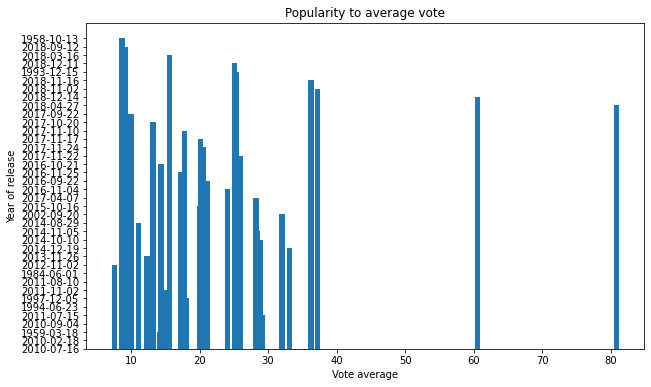

In [ ]:
tmdb_figure, ax = plt.subplots(figsize=(10,6))
y = df_tmdb['release_date']
x = df_tmdb['popularity']

ax.bar(x,y)
ax.set_title("Popularity to average vote")
ax.set_xlabel('Vote average')
ax.set_ylabel('Year of release')
plt.show()

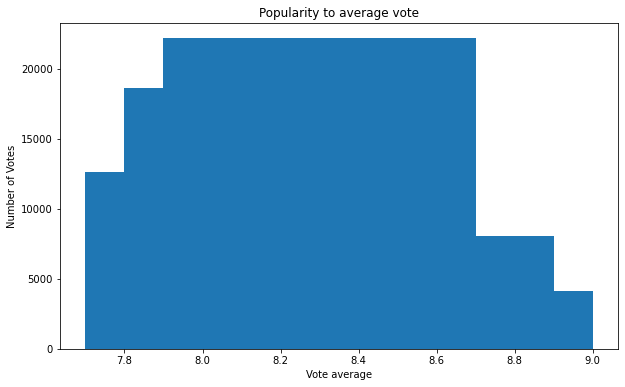

In [ ]:
tmdb_figure, ax = plt.subplots(figsize=(10,6))
x = df_tmdb['vote_average']
y = df_tmdb['vote_count']

ax.bar(x,y)
ax.set_title("Popularity to average vote")
ax.set_xlabel('Vote average')
ax.set_ylabel('Number of Votes')
plt.show()

## Conclusion

The analysis leads to the following recomendations;
1. On the genre of movie we can first release:
   1. Documentary,Music,Sport	
   2. Documentary,Music,War	
   3. Documentary	
   4. Comedy,Music,Musical	
   5. Adventure,Drama,War	
   6. Drama,Family,Musical	
as per data from im.db database 
2. That ratings generated depended on the number of people that voted and as such data with high number of votes and a high rating were considered in the analysis.
3. Apart from the two year in the 90s most of the recent movies were also popular and thus indicated that there are still people that watch movies.


## Next step

Further analysis could help in identifying:
1. Best time for a movie to be released by the studio.This could use data from the box office to know period that movies are watched alot.
2. Predict revenue that can be made from the box office after release of the movie. This could help inform or change the approach used in advertising or promoting the movie.